### Ali Darabi - 810100264
### Hesam Ramezanian - 810100248

# Data Science - Assignment 6

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import warnings

# <span style="color:pink;">Tasks</span>

## <span style="color:cyan;">1. Preprocessing</span>

In [2]:
diabeteDF = pd.read_csv('diabetic_data.csv')
diabeteDF.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
diabeteDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
nullCounts = diabeteDF.isnull().sum()
nullCounts

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [5]:
columnsForDrop = ['max_glu_serum', 'A1Cresult']
diabeteDF = diabeteDF.drop(columns=columnsForDrop)

In [6]:
nullCounts = diabeteDF.isnull().sum()
nullCounts

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

In [7]:
labelEncoder = LabelEncoder()

In [8]:
def fillMissingValues(columnName):
    valueCounts = diabeteDF[columnName].value_counts()
    valueCounts = valueCounts.drop('?')
    weights = valueCounts / valueCounts.sum()
    diabeteDF.loc[diabeteDF[columnName] == '?', columnName] = np.random.choice(weights.index, size=sum(diabeteDF[columnName] == '?'), p=weights.values)

In [9]:
diabeteDF['patient_nbr'].value_counts()

patient_nbr
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: count, Length: 71518, dtype: int64

In [10]:
dropDupDF = diabeteDF.drop_duplicates()
print("Number of Duplicates :", len(diabeteDF) - len(dropDupDF))

Number of Duplicates : 0


In [11]:
diabeteDF['race'].value_counts()                

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [12]:
fillMissingValues('race')
diabeteDF['race'] = labelEncoder.fit_transform(diabeteDF['race'])
diabeteDF['race'].value_counts()  

race
2    77883
0    19604
3     2088
4     1535
1      656
Name: count, dtype: int64

In [13]:
diabeteDF['gender'].value_counts()  

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [14]:
rowsToDrop = diabeteDF[diabeteDF['gender'] == 'Unknown/Invalid'].index
diabeteDF = diabeteDF.drop(rowsToDrop)
diabeteDF = diabeteDF.reset_index(drop=True)
diabeteDF['gender'].value_counts()  

gender
Female    54708
Male      47055
Name: count, dtype: int64

In [15]:
diabeteDF['gender'] = labelEncoder.fit_transform(diabeteDF['gender'])
diabeteDF['gender'].value_counts()  

gender
0    54708
1    47055
Name: count, dtype: int64

In [16]:
diabeteDF['age'].value_counts()                   

age
[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

In [17]:
diabeteDF['age'] = labelEncoder.fit_transform(diabeteDF['age'])
diabeteDF['age'].value_counts() 

age
7    26066
6    22482
5    17256
8    17197
4     9685
3     3775
9     2793
2     1657
1      691
0      161
Name: count, dtype: int64

In [18]:
diabeteDF['weight'].value_counts()                      

weight
?            98566
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

In [19]:
diabeteDF = diabeteDF.drop(columns='weight')

In [20]:
diabeteDF['admission_type_id'].value_counts()      

admission_type_id
1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64

5 : Not Available

6 : NULL

8 : Not Mapped

In [21]:
diabeteDF = diabeteDF[~diabeteDF['admission_type_id'].isin([5, 6, 8])]
diabeteDF = diabeteDF.reset_index(drop=True)
diabeteDF['admission_type_id'] = labelEncoder.fit_transform(diabeteDF['admission_type_id'])
diabeteDF['admission_type_id'].value_counts()

admission_type_id
0    53988
2    18868
1    18480
4       21
3       10
Name: count, dtype: int64

In [22]:
diabeteDF['discharge_disposition_id'].value_counts()  

discharge_disposition_id
1     55135
3     12063
6     11384
18     3682
22     1940
2      1864
11     1484
5      1040
4       802
7       559
13      388
23      375
14      290
28      101
8        94
15       63
24       48
25       19
9        16
19        8
27        5
12        3
17        3
20        1
Name: count, dtype: int64

18 : NULL

25 : Not Mapped

26 : Unknown/Invalid

In [23]:
diabeteDF = diabeteDF[~diabeteDF['discharge_disposition_id'].isin([18, 25, 26])]
diabeteDF = diabeteDF.reset_index(drop=True)
diabeteDF['discharge_disposition_id'] = labelEncoder.fit_transform(diabeteDF['discharge_disposition_id'])
diabeteDF['discharge_disposition_id'].value_counts()

discharge_disposition_id
0     55135
2     12063
5     11384
17     1940
1      1864
9      1484
4      1040
3       802
6       559
11      388
18      375
12      290
21      101
7        94
13       63
19       48
8        16
15        8
20        5
10        3
14        3
16        1
Name: count, dtype: int64

In [24]:
diabeteDF['admission_source_id'].value_counts()     

admission_source_id
7     53619
1     26153
4      2662
6      2225
2       964
17      873
5       740
20      161
9       125
3       102
8        15
22       12
10        8
14        2
11        2
25        2
13        1
Name: count, dtype: int64

9 : Not Available

15 : Not Available

17 : NULL

20, Not Mapped

21,Unknown/Invalid

In [25]:
diabeteDF = diabeteDF[~diabeteDF['admission_source_id'].isin([9, 15, 17, 20, 21])]
diabeteDF = diabeteDF.reset_index(drop=True)
diabeteDF['admission_source_id'] = labelEncoder.fit_transform(diabeteDF['admission_source_id'])
diabeteDF['admission_source_id'].value_counts()

admission_source_id
6     53619
0     26153
3      2662
5      2225
1       964
4       740
2       102
7        15
12       12
8         8
11        2
9         2
13        2
10        1
Name: count, dtype: int64

In [26]:
diabeteDF['time_in_hospital'].value_counts()

time_in_hospital
3     15101
2     14871
1     12007
4     11843
5      8482
6      6364
7      5017
8      3671
9      2521
10     1978
11     1550
12     1201
13     1005
14      896
Name: count, dtype: int64

In [27]:
diabeteDF['payer_code'].value_counts()  

payer_code
MC    29989
?     28708
HM     5682
SP     4933
BC     4489
MD     3365
CP     2475
UN     2367
CM     1914
OG     1030
PO      592
DM      509
CH      141
WC      129
OT       95
MP       76
SI       12
FR        1
Name: count, dtype: int64

In [28]:
fillMissingValues('payer_code')
diabeteDF['payer_code'] = labelEncoder.fit_transform(diabeteDF['payer_code'])
diabeteDF['payer_code'].value_counts()  

payer_code
7     44792
6      8532
14     7483
0      6784
8      5037
3      3702
15     3488
2      2823
10     1533
12      893
4       764
1       203
16      196
11      142
9       111
13       23
5         1
Name: count, dtype: int64

In [29]:
diabeteDF['medical_specialty'].value_counts()  

medical_specialty
?                                42145
InternalMedicine                 12972
Emergency/Trauma                  7536
Family/GeneralPractice            5366
Cardiology                        4284
                                 ...  
AllergyandImmunology                 1
Psychiatry-Addictive                 1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: count, Length: 71, dtype: int64

In [30]:
fillMissingValues('medical_specialty')
diabeteDF['medical_specialty'] = labelEncoder.fit_transform(diabeteDF['medical_specialty'])
diabeteDF['medical_specialty'].value_counts()  

medical_specialty
18    25171
8     14697
11    10625
3      8366
61     4953
      ...  
21        3
39        2
7         2
46        1
56        1
Name: count, Length: 70, dtype: int64

In [31]:
diabeteDF['num_lab_procedures'].value_counts()         

num_lab_procedures
1      2879
43     2510
44     2186
45     2095
38     2006
       ... 
103       2
132       1
121       1
126       1
118       1
Name: count, Length: 114, dtype: int64

In [32]:
diabeteDF['num_procedures'].value_counts()

num_procedures
0    39841
1    17489
2    10780
3     7933
6     4297
4     3582
5     2585
Name: count, dtype: int64

In [33]:
diabeteDF['num_medications'].value_counts()

num_medications
13    5149
12    5108
15    4932
14    4887
11    4870
      ... 
70       2
75       2
81       1
79       1
74       1
Name: count, Length: 75, dtype: int64

In [34]:
diabeteDF['number_outpatient'].value_counts()

number_outpatient
0     72949
1      7010
2      2861
3      1614
4       879
5       411
6       244
7       136
8        87
9        68
10       49
11       38
12       29
13       27
14       21
15       19
16       14
17        7
21        6
20        6
18        4
22        4
19        3
24        3
23        2
25        2
33        2
26        2
34        1
39        1
42        1
35        1
29        1
28        1
27        1
37        1
38        1
40        1
Name: count, dtype: int64

In [35]:
diabeteDF['number_emergency'].value_counts()

number_emergency
0     76657
1      6634
2      1730
3       635
4       332
5       171
6        83
7        68
8        46
10       34
9        31
11       23
13       12
12       10
16        5
18        5
20        4
19        4
22        4
15        3
14        3
21        2
24        1
37        1
54        1
63        1
64        1
25        1
76        1
46        1
28        1
42        1
29        1
Name: count, dtype: int64

In [36]:
diabeteDF['number_inpatient'].value_counts()

number_inpatient
0     57266
1     16668
2      6459
3      2936
4      1394
5       707
6       421
7       243
8       138
9       101
10       55
11       48
12       32
13       19
14        8
15        7
16        2
21        1
18        1
19        1
Name: count, dtype: int64

In [37]:
diabeteDF['diag_1'].value_counts() 

diag_1
428       5831
414       5585
786       3257
410       3000
486       2946
          ... 
V43          1
838          1
955          1
250.51       1
V51          1
Name: count, Length: 710, dtype: int64

In [38]:
diabeteDF['diag_1'] = diabeteDF['diag_1'].replace('?', diabeteDF['diag_1'].mode()[0])
diabeteDF['diag_1'] = labelEncoder.fit_transform(diabeteDF['diag_1'])
diabeteDF['diag_1'].value_counts() 

diag_1
272    5849
259    5585
535    3257
255    3000
321    2946
       ... 
694       1
580       1
652       1
113       1
696       1
Name: count, Length: 709, dtype: int64

In [39]:
diabeteDF['diag_2'].value_counts()

diag_2
276    5830
428    5566
250    4995
427    4244
401    3158
       ... 
52        1
990       1
232       1
615       1
927       1
Name: count, Length: 728, dtype: int64

In [40]:
fillMissingValues('diag_2')
diabeteDF['diag_2'] = labelEncoder.fit_transform(diabeteDF['diag_2'])
diabeteDF['diag_2'].value_counts() 

diag_2
130    5857
258    5589
76     5008
257    4263
236    3167
       ... 
495       1
624       1
177       1
169       1
603       1
Name: count, Length: 727, dtype: int64

In [41]:
fillMissingValues('diag_3')
diabeteDF['diag_3'] = labelEncoder.fit_transform(diabeteDF['diag_3'])
diabeteDF['diag_3'].value_counts()                  

diag_3
84     9749
241    7091
136    4577
263    3984
262    3378
       ... 
42        1
95        1
97        1
450       1
645       1
Name: count, Length: 769, dtype: int64

In [42]:
diabeteDF['number_diagnoses'].value_counts()         

number_diagnoses
9     44183
5      9505
8      8718
7      8519
6      7691
4      4522
3      2241
2       819
1       194
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: count, dtype: int64

In [43]:
medicineList = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
                'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
                'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                'metformin-pioglitazone']

for column in medicineList:
    diabeteDF[column] = labelEncoder.fit_transform(diabeteDF[column])

In [44]:
medicineToDrop = ['repaglinide', 'nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
                   'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                   'metformin-pioglitazone']

diabeteDF = diabeteDF.drop(columns=medicineToDrop)

If 100% of the values in a column are the same, then the column is considered a constant column. If a very high percentage (e.g., 99.1%) of the values in the column are the same, the column may also be considered a constant column. Constant columns are dropped or removed during data preprocessing because they do not provide any useful information or variation for analysis or modeling purposes.

In [45]:
diabeteDF['change'].value_counts() 

change
No    45901
Ch    40606
Name: count, dtype: int64

In [46]:
diabeteDF['change'] = labelEncoder.fit_transform(diabeteDF['change'])
diabeteDF['change'].value_counts() 

change
1    45901
0    40606
Name: count, dtype: int64

In [47]:
diabeteDF['diabetesMed'].value_counts()

diabetesMed
Yes    67176
No     19331
Name: count, dtype: int64

In [48]:
diabeteDF['diabetesMed'] = labelEncoder.fit_transform(diabeteDF['diabetesMed'])
diabeteDF['diabetesMed'].value_counts() 

diabetesMed
1    67176
0    19331
Name: count, dtype: int64

In [49]:
diabeteDF['readmitted'].value_counts()

readmitted
NO     46728
>30    30116
<30     9663
Name: count, dtype: int64

In [50]:
diabeteDF['readmitted'] = labelEncoder.fit_transform(diabeteDF['readmitted'])
diabeteDF['readmitted'].value_counts() 

readmitted
2    46728
1    30116
0     9663
Name: count, dtype: int64

In [51]:
diabeteDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86507 entries, 0 to 86506
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   encounter_id              86507 non-null  int64
 1   patient_nbr               86507 non-null  int64
 2   race                      86507 non-null  int32
 3   gender                    86507 non-null  int32
 4   age                       86507 non-null  int32
 5   admission_type_id         86507 non-null  int64
 6   discharge_disposition_id  86507 non-null  int64
 7   admission_source_id       86507 non-null  int64
 8   time_in_hospital          86507 non-null  int64
 9   payer_code                86507 non-null  int32
 10  medical_specialty         86507 non-null  int32
 11  num_lab_procedures        86507 non-null  int64
 12  num_procedures            86507 non-null  int64
 13  num_medications           86507 non-null  int64
 14  number_outpatient         86507 non-nu

In [52]:
def countOutliers(k, col):
    median = diabeteDF[col].median()
    iqr = diabeteDF[col].quantile(0.75) - diabeteDF[col].quantile(0.25)
    lower_threshold = median - k * iqr
    upper_threshold = median + k * iqr
    outliers = diabeteDF[(diabeteDF[col] < lower_threshold) | (diabeteDF[col] > upper_threshold)]
    print(col, " Num Outliers : ", len(outliers))

In [53]:
def dropOutliers(column, value):
    valueCounts = diabeteDF[column].value_counts()
    values_to_drop = valueCounts[valueCounts <= value].index.tolist()
    return diabeteDF[~diabeteDF[column].isin(values_to_drop)]

In [54]:
diabeteDF = dropOutliers('race', 1000)
diabeteDF['race'] = labelEncoder.fit_transform(diabeteDF['race'])
diabeteDF['race'].value_counts()

race
1    65616
0    17436
2     1574
3     1306
Name: count, dtype: int64

In [55]:
diabeteDF = dropOutliers('age', 200)
diabeteDF['age'] = labelEncoder.fit_transform(diabeteDF['age'])
diabeteDF['age'].value_counts()

age
6    21574
5    19157
4    14650
7    14591
3     8109
2     3224
8     2382
1     1466
0      634
Name: count, dtype: int64

In [56]:
diabeteDF = dropOutliers('admission_type_id', 17000)
diabeteDF['admission_type_id'] = labelEncoder.fit_transform(diabeteDF['admission_type_id'])
diabeteDF['admission_type_id'].value_counts()

admission_type_id
0    50812
2    17694
1    17252
Name: count, dtype: int64

In [57]:
diabeteDF = dropOutliers('discharge_disposition_id', 1000)
diabeteDF['discharge_disposition_id'] = labelEncoder.fit_transform(diabeteDF['discharge_disposition_id'])
diabeteDF['discharge_disposition_id'].value_counts()

discharge_disposition_id
0    54009
2    11727
4    11109
6     1920
1     1803
5     1451
3     1019
Name: count, dtype: int64

In [58]:
diabeteDF = dropOutliers('payer_code', 1000)
diabeteDF['payer_code'] = labelEncoder.fit_transform(diabeteDF['payer_code'])
diabeteDF['payer_code'].value_counts()

payer_code
4    42907
3     8243
7     7199
0     6583
5     4758
2     3584
8     3339
1     2734
6     1447
Name: count, dtype: int64

In [59]:
diabeteDF = dropOutliers('medical_specialty', 1000)
diabeteDF['medical_specialty'] = labelEncoder.fit_transform(diabeteDF['medical_specialty'])
diabeteDF['medical_specialty'].value_counts()

medical_specialty
3     23458
1     13752
2      9887
0      7889
12     4656
4      2598
6      2099
10     2064
7      1407
9      1279
8      1258
11     1180
5      1062
Name: count, dtype: int64

In [60]:
diabeteDF = dropOutliers('num_lab_procedures', 40)
diabeteDF['num_lab_procedures'] = labelEncoder.fit_transform(diabeteDF['num_lab_procedures'])
diabeteDF['num_lab_procedures'].value_counts()

num_lab_procedures
0     2295
42    2196
43    1864
44    1794
39    1669
      ... 
85      87
87      79
86      67
88      50
89      41
Name: count, Length: 90, dtype: int64

In [61]:
diabeteDF = dropOutliers('num_medications', 200)
diabeteDF['num_medications'] = labelEncoder.fit_transform(diabeteDF['num_medications'])
diabeteDF['num_medications'].value_counts()

num_medications
11    4365
10    4323
13    4190
12    4152
9     4127
14    3922
8     3807
15    3523
7     3471
16    3232
6     3092
17    2848
18    2638
5     2490
19    2302
20    2017
4     1920
21    1696
22    1461
3     1412
23    1322
24    1147
25    1011
2      964
26     862
27     709
1      601
28     595
29     479
30     450
31     358
0      334
32     319
33     278
34     206
Name: count, dtype: int64

In [62]:
diabeteDF = dropOutliers('number_outpatient', 1000)
diabeteDF['number_outpatient'] = labelEncoder.fit_transform(diabeteDF['number_outpatient'])
diabeteDF['number_outpatient'].value_counts()

number_outpatient
0    59517
1     5672
2     2395
3     1349
Name: count, dtype: int64

In [63]:
diabeteDF = dropOutliers('number_emergency', 1000)
diabeteDF['number_emergency'] = labelEncoder.fit_transform(diabeteDF['number_emergency'])
diabeteDF['number_emergency'].value_counts()

number_emergency
0    61210
1     5259
2     1320
Name: count, dtype: int64

In [64]:
diabeteDF = dropOutliers('number_inpatient', 1000)
diabeteDF['number_inpatient'] = labelEncoder.fit_transform(diabeteDF['number_inpatient'])
diabeteDF['number_inpatient'].value_counts()

number_inpatient
0    45669
1    12975
2     4923
3     2118
Name: count, dtype: int64

In [65]:
diabeteDF = dropOutliers('diag_1', 40)
diabeteDF['diag_1'] = labelEncoder.fit_transform(diabeteDF['diag_1'])
diabeteDF['diag_1'].value_counts()

diag_1
70     4623
61     4310
156    2745
90     2396
58     2361
       ... 
33       42
115      41
9        41
125      41
173      41
Name: count, Length: 180, dtype: int64

In [66]:
diabeteDF = dropOutliers('diag_2', 40)
diabeteDF['diag_2'] = labelEncoder.fit_transform(diabeteDF['diag_2'])
diabeteDF['diag_2'].value_counts()

diag_2
71     4112
29     4076
12     3687
70     3249
54     2411
       ... 
16       43
105      43
75       43
111      42
36       41
Name: count, Length: 164, dtype: int64

In [67]:
diabeteDF = dropOutliers('diag_3', 100)
diabeteDF['diag_3'] = labelEncoder.fit_transform(diabeteDF['diag_3'])
diabeteDF['diag_3'].value_counts()

diag_3
4     6601
24    5024
12    3070
38    2802
37    2403
      ... 
21     106
55     106
2      104
0      103
49     101
Name: count, Length: 89, dtype: int64

In [68]:
diabeteDF = dropOutliers('number_diagnoses', 500)
diabeteDF['number_diagnoses'] = labelEncoder.fit_transform(diabeteDF['number_diagnoses'])
diabeteDF['number_diagnoses'].value_counts()

number_diagnoses
6    24314
2     5865
5     4970
4     4903
3     4526
1     2736
0     1258
Name: count, dtype: int64

In [69]:
encounterIdList = diabeteDF['encounter_id'].values
columnsForDrop = ['encounter_id']
diabeteDF = diabeteDF.drop(columns=columnsForDrop) 

In [70]:
len(diabeteDF['change'])

48572

In [71]:
diabeteDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48572 entries, 4 to 86505
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   patient_nbr               48572 non-null  int64
 1   race                      48572 non-null  int64
 2   gender                    48572 non-null  int32
 3   age                       48572 non-null  int64
 4   admission_type_id         48572 non-null  int64
 5   discharge_disposition_id  48572 non-null  int64
 6   admission_source_id       48572 non-null  int64
 7   time_in_hospital          48572 non-null  int64
 8   payer_code                48572 non-null  int64
 9   medical_specialty         48572 non-null  int64
 10  num_lab_procedures        48572 non-null  int64
 11  num_procedures            48572 non-null  int64
 12  num_medications           48572 non-null  int64
 13  number_outpatient         48572 non-null  int64
 14  number_emergency          48572 non-null  i

In [72]:
scaler = StandardScaler()
dfColumns = diabeteDF.columns
diabeteDF = scaler.fit_transform(diabeteDF)
diabeteDF = pd.DataFrame(diabeteDF, columns=dfColumns)

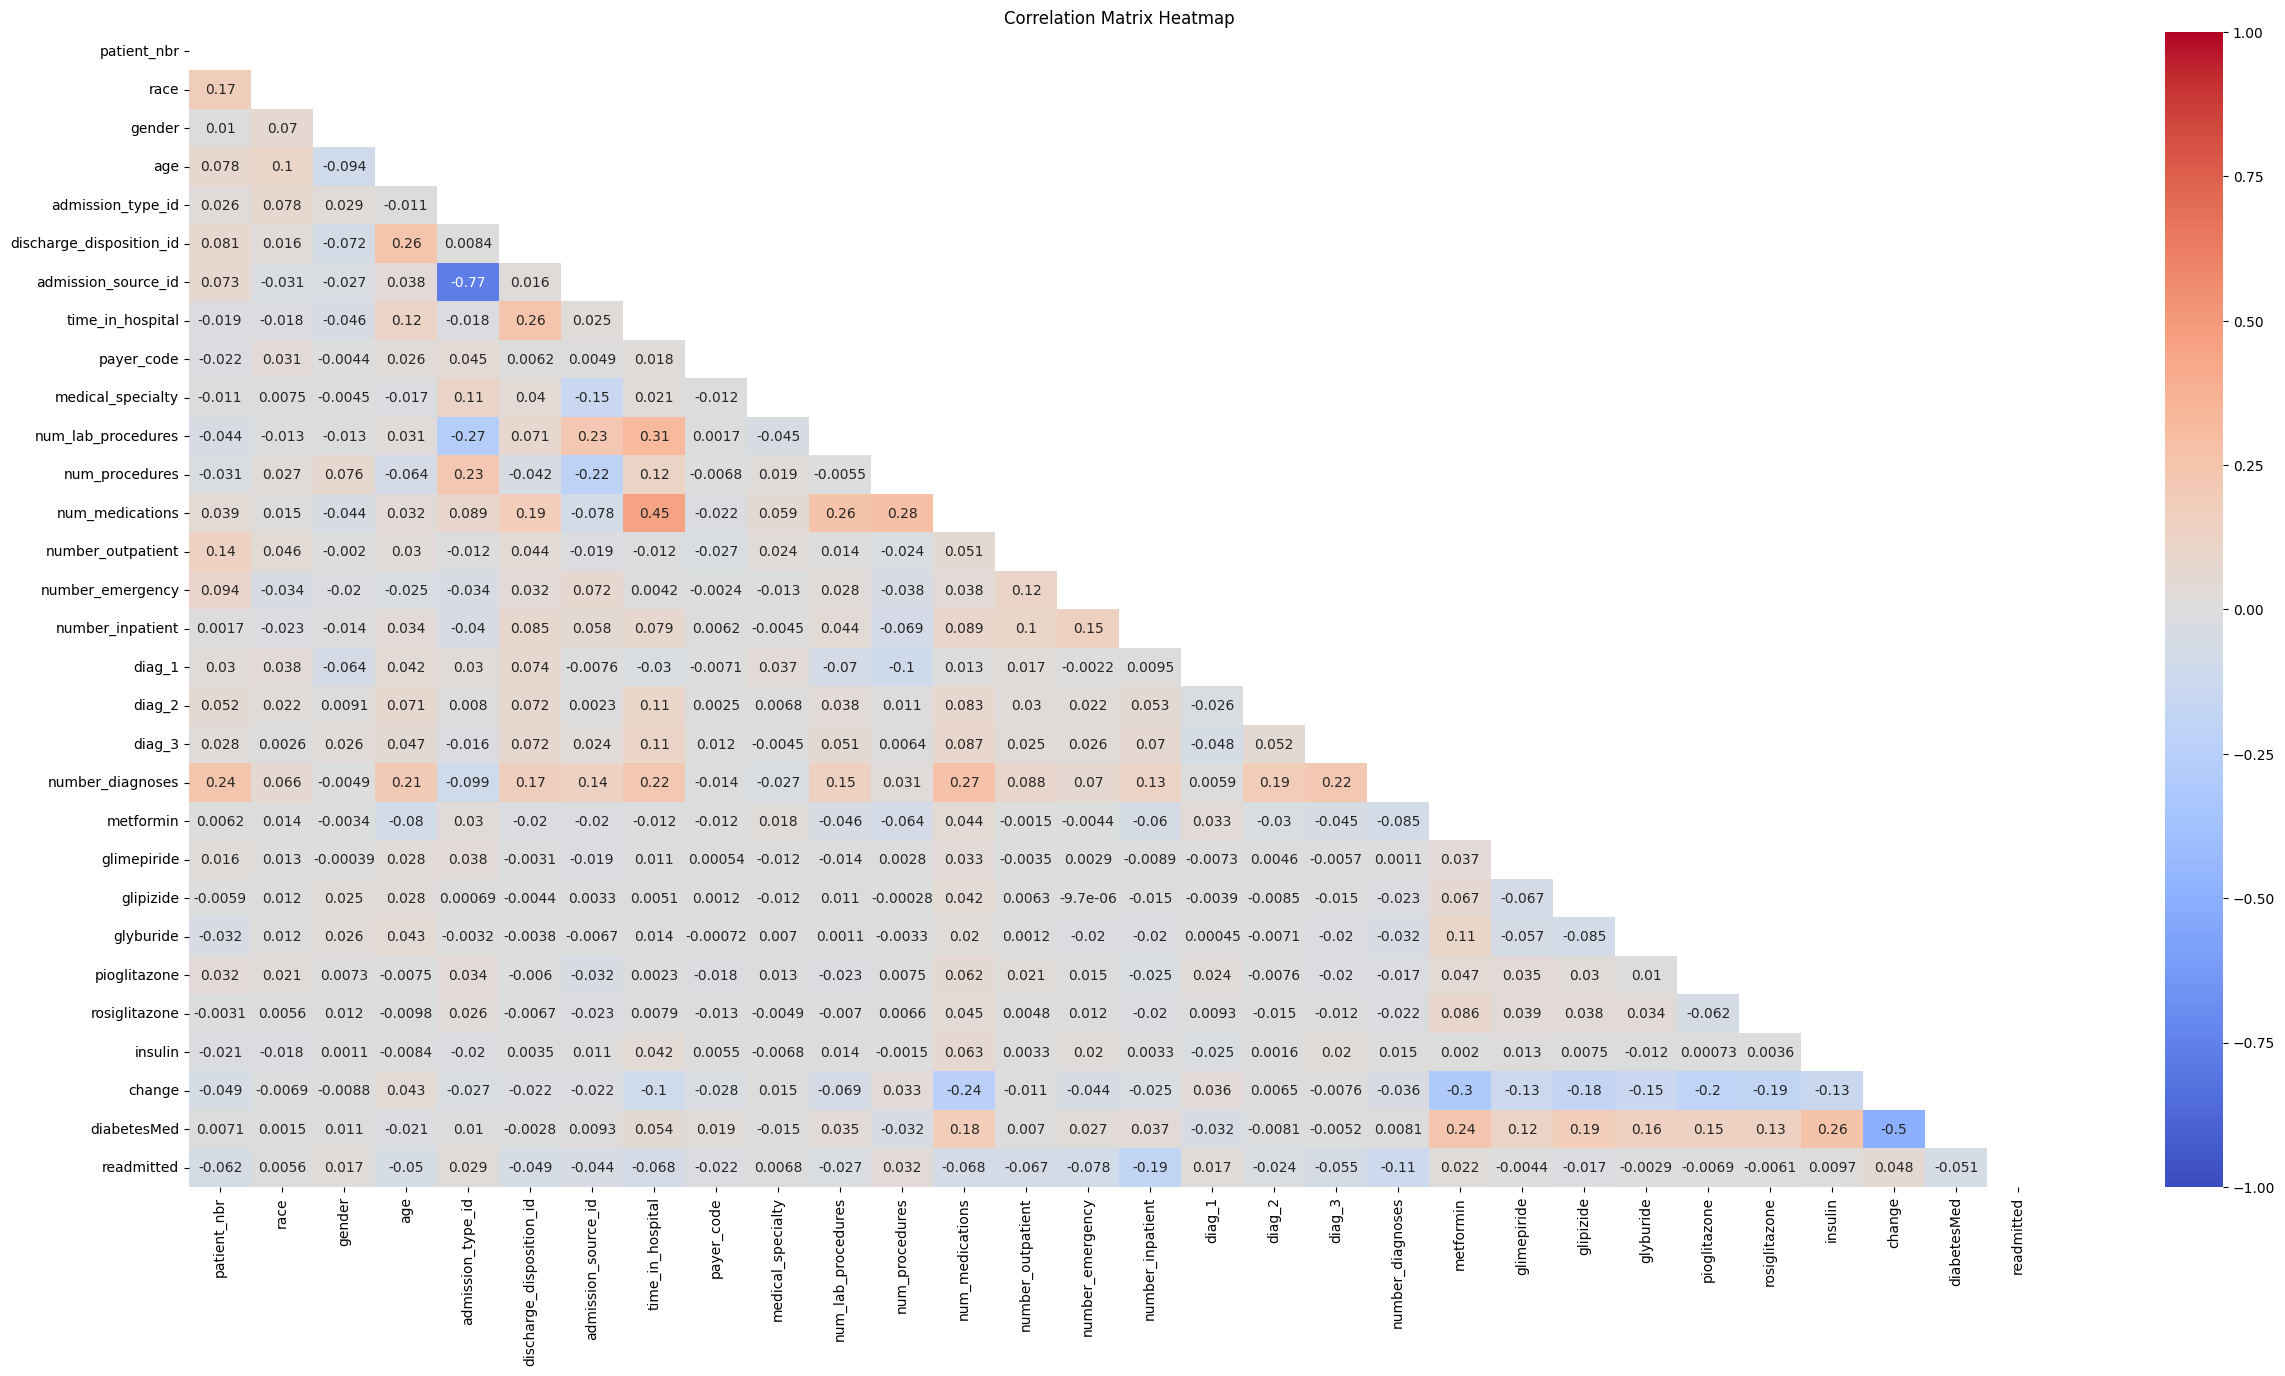

In [73]:
corrMatrix = diabeteDF.corr()
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
plt.figure(figsize=(30, 15))
sns.heatmap(corrMatrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

## <span style="color:cyan;">2. Dimensionality Reduction</span>

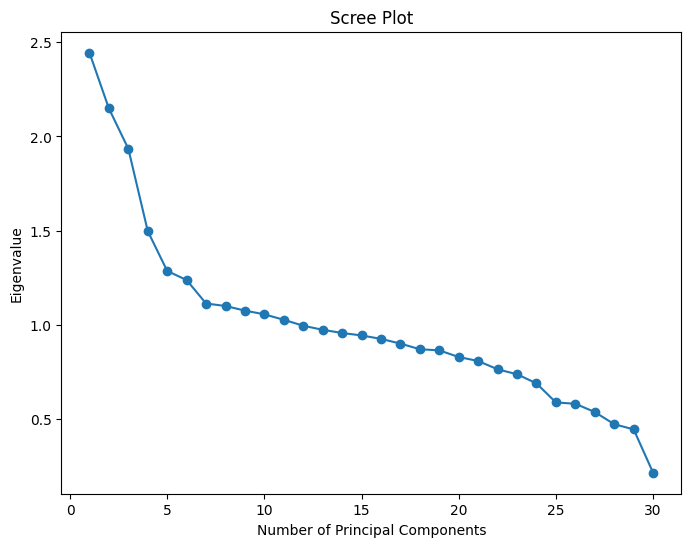

In [74]:
pca = PCA().fit(diabeteDF)
eigenvalues = pca.explained_variance_
num_components = range(1, len(eigenvalues) + 1)
plt.figure(figsize=(8, 6))
plt.plot(num_components, eigenvalues, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

In [75]:
columnList = []
numComponents = 2 #or 5
for i in range(numComponents):
    columnList.append("Feature" + str(i))

pca = PCA(n_components=numComponents)
pca.fit(diabeteDF)
pcaData = pca.transform(diabeteDF)
pcaDf = pd.DataFrame(data=pcaData, columns=columnList)

In [76]:
pcaDf

,Feature0,Feature1
0,-1.034823,1.270365
1,0.703901,2.576801
2,0.469939,-1.214196
3,1.451117,2.329037
4,1.168458,-1.075237
...,...,...
48567,0.424102,1.745740
48568,3.243639,0.991236
48569,4.463670,0.977269
48570,-0.097171,-0.147692


## <span style="color:cyan;">3. Unsupervised Learning</span>

### <span style="color:cyan;">Silhouette Method</span>

In [77]:
def silhouetteScorer(estimator, X):
    labels = estimator.fit_predict(X)
    score = silhouette_score(X, labels)
    return score

In [78]:
warnings.filterwarnings("ignore")
kmeans = KMeans()
paramGrid = {'n_clusters': range(2, 10)}
gridSearch = GridSearchCV(kmeans, paramGrid, scoring=silhouetteScorer, cv=5)
gridSearch.fit(pcaDf)
bestParams = gridSearch.best_params_
bestScore = gridSearch.best_score_
print(f"Optimal number of clusters for K-Means: {bestParams}")
print(f"Best silhouette score: {bestScore}")
optimalK = bestParams['n_clusters']

Optimal number of clusters for K-Means: {'n_clusters': 3}
Best silhouette score: 0.3695866495465915


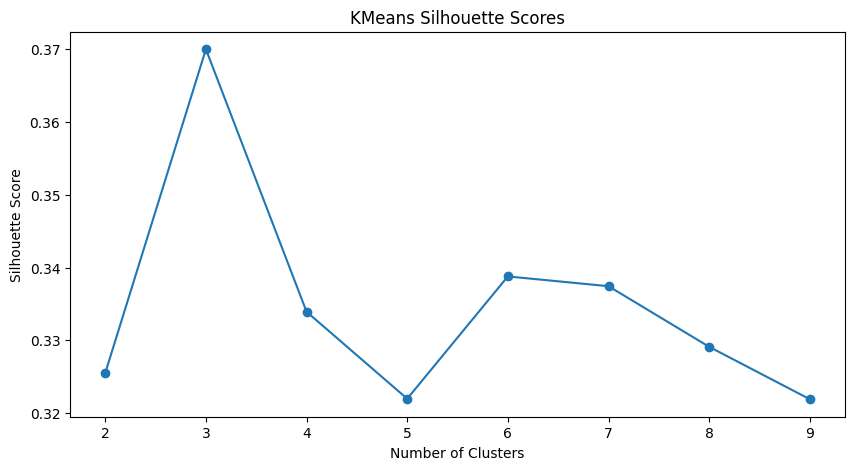

In [79]:
kmeansSilhouetteScores = []
kmeansClusters = range(2, 10)
for numClusters in kmeansClusters:
    kmeans = KMeans(n_clusters=numClusters, random_state=39)
    labels = kmeans.fit_predict(pcaDf)
    score = silhouette_score(pcaDf, labels)
    kmeansSilhouetteScores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(kmeansClusters, kmeansSilhouetteScores, marker='o')
plt.title('KMeans Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [80]:
warnings.filterwarnings("ignore")
dbscaEps = np.arange(0.4, 1.5, 0.1) 
dbscanMinSamples = range(2, 7)
dbscanSilhouetteScores = []
for eps in dbscaEps:
    for minSamples in dbscanMinSamples:
        dbscan = DBSCAN(eps=eps, min_samples=minSamples)
        labels = dbscan.fit_predict(pcaDf)

        if len(set(labels)) > 1:
            score = silhouette_score(pcaDf, labels)
        else:
            score = -1 
        dbscanSilhouetteScores.append((eps, minSamples, score))

epsValues = [item[0] for item in dbscanSilhouetteScores]
minSamplesValues = [item[1] for item in dbscanSilhouetteScores]
silhouetteValues = [item[2] for item in dbscanSilhouetteScores]
bestIndex = np.argmax(silhouetteValues)
bestEps = epsValues[bestIndex]
bestMinSamples = minSamplesValues[bestIndex]
bestSilhouetteScore = silhouetteValues[bestIndex]
print(f"Best epsilon for DBSCAN: {bestEps}")
print(f"Best min_samples for DBSCAN: {bestMinSamples}")
print(f"Best silhouette score: {bestSilhouetteScore}")
optimalEps = bestEps
optimalMinSamples = bestMinSamples

Best epsilon for DBSCAN: 0.9999999999999999
Best min_samples for DBSCAN: 2
Best silhouette score: 0.5520750736601912


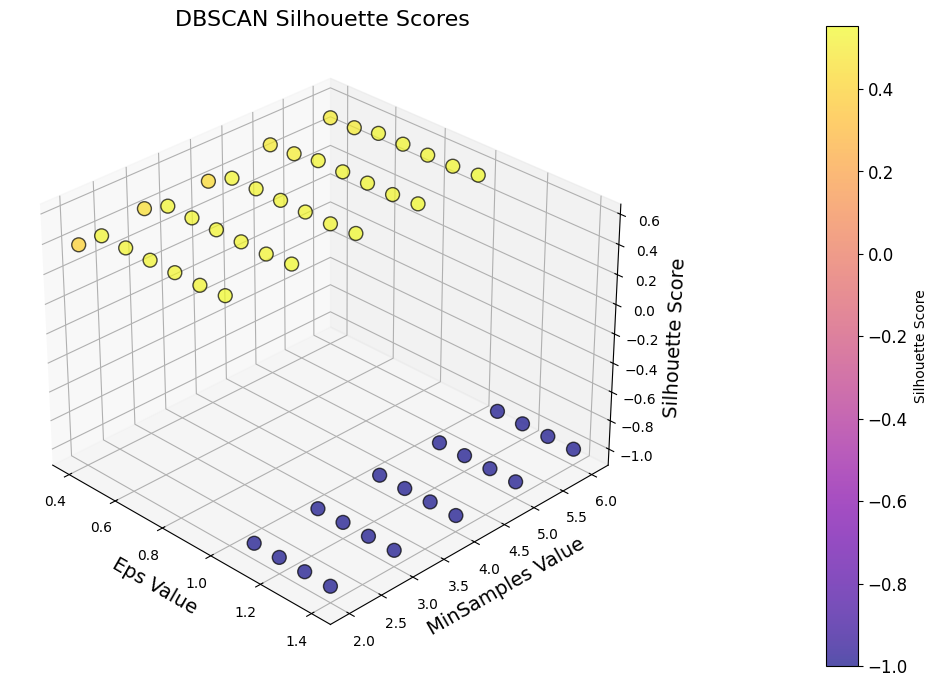

In [81]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(epsValues, minSamplesValues, silhouetteValues,
                c=silhouetteValues, cmap='plasma', s=100, alpha=0.7,
                marker='o', edgecolors='k')
ax.view_init(elev=30, azim=-45)
ax.set_title('DBSCAN Silhouette Scores', fontsize=16)
ax.set_xlabel('Eps Value', fontsize=14)
ax.set_ylabel('MinSamples Value', fontsize=14)
ax.set_zlabel('Silhouette Score', fontsize=14)
ax.grid(True)
cbar = fig.colorbar(sc, ax=ax, label='Silhouette Score', pad=0.2)
cbar.ax.tick_params(labelsize=12)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
plt.show()

### <span style="color:cyan;">K-Means</span>

In [82]:
def plotKMeansClusters(labels, type):
    pcaComponents = pcaDf.values
    numClusters = len(np.unique(labels))
    plt.figure(figsize=(8, 6))
    for cluster in range(numClusters):
        clusterData = pcaComponents[labels == cluster]
        plt.scatter(clusterData[:, 0], clusterData[:, 1], label=f'Cluster {cluster}')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'{type} Clustering')
    plt.legend()
    plt.show()

In [83]:
kmeans = KMeans(n_clusters=optimalK)
kmeans.fit(pcaDf)
kmeansLabels = kmeans.labels_

In [84]:
uniqueValues, counts = np.unique(kmeansLabels, return_counts=True)
print("Unique Values:", uniqueValues)
print("Counts:", counts)

Unique Values: [0 1 2]
Counts: [17351 13940 17281]


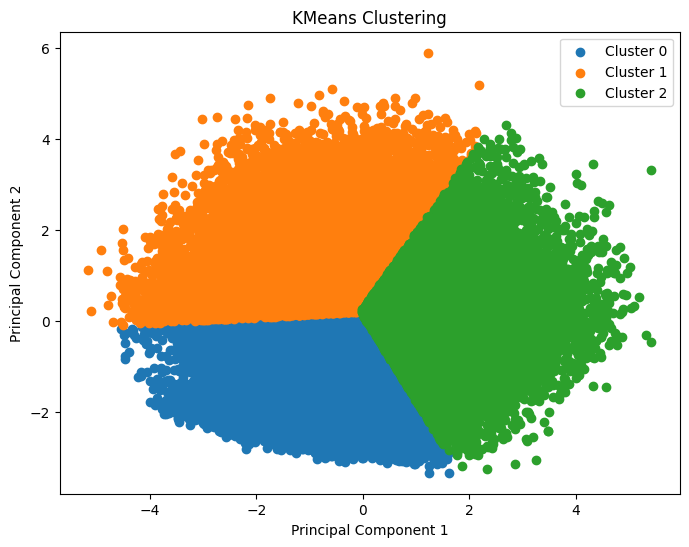

In [85]:
if (len(pcaDf.columns) == 2):
    plotKMeansClusters(kmeansLabels, 'KMeans')

### <span style="color:cyan;">DBSCAN</span>

In [86]:
dbscan = DBSCAN(eps=optimalEps, min_samples=optimalMinSamples)
dbscan.fit(pcaDf)
dbscanLabels = dbscan.labels_

In [87]:
uniqueValues, counts = np.unique(dbscanLabels, return_counts=True)
print("Unique Values:", uniqueValues)
print("Counts:", counts)

Unique Values: [-1  0]
Counts: [    2 48570]


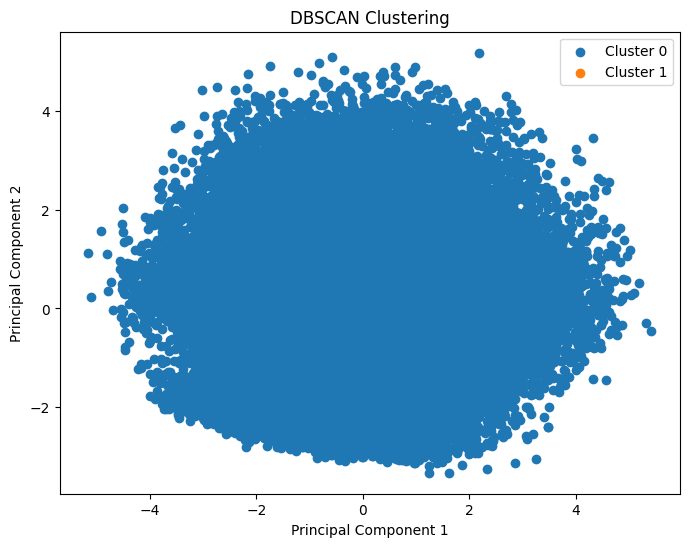

In [88]:
if (len(pcaDf.columns) == 2):
    plotKMeansClusters(dbscanLabels, 'DBSCAN')

In [89]:
result = pd.DataFrame({
    'id_encounter': encounterIdList,
    'kmeans_label': kmeansLabels,
    'dbscan_label': dbscanLabels
})
result.to_csv('clustering_results.csv', index=False)

## <span style="color:cyan;">Questions</span>

### <span style="color: pink;">1. What preprocessing steps did you perform on the dataset? Provide clear reasons for each decision made.</span>

**Preprocessing Steps and Rationale:**

1. **Dropping Columns with Excessive Missing Values:**
   - We dropped columns with over 80% of their data as NULL values. This decision was made to prevent the potential corruption of the dataset, as filling such a large number of missing values could introduce significant bias or inaccuracies.

2. **Handling Missing Values in Remaining Columns:**
   - For the remaining columns, we checked the unique values and filled missing values using a weighted random sampling of the other values. This approach was chosen because nearly every column had missing values, and more complex imputation methods like regression were not feasible.

3. **Dropping Columns with Predominantly Missing Values:**
   - Columns where the majority of data was missing (e.g., the 'weight' column) were dropped. This was necessary as these columns did not provide enough reliable information to be useful for analysis.

4. **Dropping Constant Columns:**
   - Constant columns, where 100% of the values are the same, were dropped because they do not contribute any meaningful information about the dataset. Columns with a very high percentage of the same value (e.g., 99.1%) were also considered constant and removed.

5. **Encoding Categorical Columns:**
   - We used `LabelEncoder` to convert categorical columns into numerical values. This step is crucial for preparing categorical data for machine learning models that require numerical input.

6. **Handling Specific Column Values:**
   - Rows with values such as NULL, Not Available, Not Mapped, Unknown/Invalid were dropped from the columns 'admission_type_id,' 'discharge_disposition_id,' and 'admission_source_id.' This step ensured the integrity and reliability of these important categorical features.

7. **Outlier Detection and Removal:**
   - We calculated the number of outliers using the Interquartile Range (IQR) method and removed them for each column. Outlier removal helps in reducing the skewness of the data and improving the performance of machine learning models.

8. **Standardizing the Dataset:**
   - Finally, we standardized the entire dataset. Standardization transforms the data to have a mean of zero and a standard deviation of one, which is often a requirement for many machine learning algorithms.

### <span style="color: pink;">2. What portion of the dataset did you retain during dimensionality reduction, and which variables were retained? Could you elaborate on the rationale behind this decision?</span>

**Rationale and Variables Retained:**

1. **Scree Plot Analysis:**
   - We performed PCA on the dataset and plotted the eigenvalues for each principal component using a Scree Plot. This plot helps visualize the variance explained by each component.
   - From the Scree Plot, we identified a point where the eigenvalues start to level off, indicating that additional components contribute less to explaining the variance. This point is often referred to as the "elbow."

2. **Selection of Principal Components:**
   - Based on the Scree Plot, we chose to retain either 5 or 2 principal components (`numComponents = 2` or `numComponents = 5`). These components were selected because they capture the majority of the variance in the dataset while reducing the dimensionality.

2. **Variables Retained:**
   - The variables retained are the principal components resulting from the PCA transformation. These new variables (principal components) are linear combinations of the original features and are named "Feature0" to "Feature6" (if 2 components are retained) or "Feature0" to "Feature4" (if 5 components are retained).

**Rationale Behind the Decision:**

- **Variance Explained:** The primary rationale for selecting 5 or 2 components is to retain the components that explain a substantial portion of the total variance in the dataset. By examining the eigenvalues, we ensured that the chosen components collectively capture the majority of the information present in the original features.
  
- **Dimensionality Reduction:** Reducing the number of dimensions helps in simplifying the dataset, making it easier to visualize and analyze. It also helps in improving the efficiency and performance of machine learning models by reducing noise and potential overfitting.

- **Preservation of Information:** By retaining components that capture most of the variance, we preserve the essential information and structure of the original dataset while eliminating redundant or less informative features.

### <span style="color: pink;">3. Include a plot illustrating the silhouette coefficient plotted against the input parameters for each clustering method within the report file.</span>

#### Done!

### <span style="color: pink;">4. How can we determine the optimal number of clusters in K-Means?</span>

### Elbow Method

1. Run K-Means with a range of k values (e.g., 2 to 10).
2. Calculate WCSS for each k.
3. Plot WCSS vs. k.
4. The "elbow" point, where WCSS decrease slows, suggests the optimal k.

### Silhouette Analysis

1. Run K-Means with different k values.
2. Calculate the average Silhouette score for each k.
3. Plot Silhouette scores vs. k.
4. The k with the highest average Silhouette score is optimal.

### Gap Statistic

1. Compare WCSS of clusters from the data with WCSS from uniformly distributed data.
2. Calculate the Gap Statistic for different k values.
3. The optimal k maximizes the Gap Statistic.

### <span style="color: pink;">5. How can we determine the optimal epsilon value and minPts in DBSCAN?</span>

### Nearest Neighbor Distance Plot
- Calculate the nearest neighbor distance for each point.
- Sort and plot these distances.
- The optimal `epsilon` is at the "elbow" point where distances increase rapidly.
- Set `min_samples` slightly higher than the expected number of points in a dense region.

### K-Nearest Neighbor Distance Plot
- Similar to the nearest neighbor plot but uses the k-th nearest neighbor.
- Choose k (e.g., 3 or 4) and plot these distances.
- The "elbow" point indicates the optimal `epsilon`.
- Set `min_samples` slightly higher than k.

### Random Sampling
- Sample a subset of data points.
- Run DBSCAN with different `epsilon` and `min_samples` values.
- Visually inspect and select the best clustering results.
- Apply these values to the entire dataset.

### Silhouette Score and Optimization
- Define ranges for `epsilon` and `min_samples`.
- Use grid search or optimization (e.g., Bayesian optimization) to find the best combination.
- Optimize for a specific metric, such as the Silhouette score.

### Visualizing the Data
- Use scatter plots or other visualizations to identify dense and sparse regions.
- This can provide insights into appropriate `epsilon` and `min_samples` values.

### <span style="color: pink;">6. When would you recommend using K-Means, and when would you suggest using DBSCAN instead?</span>

### K-Means

K-Means is a popular clustering algorithm that works well when the following conditions are met:

1. **Globular Clusters**: K-Means assumes that the clusters are globular (spherical) and have a similar size. It may not perform well if the clusters have arbitrary shapes or vary significantly in size.

2. **Known Number of Clusters**: You need to specify the number of clusters (k) beforehand. If you don't have prior knowledge about the appropriate number of clusters, you may need to try different values of k and evaluate the results.

3. **No Noise or Outliers**: K-Means is sensitive to noise and outliers, as it assigns every data point to a cluster. If your data contains a significant number of outliers, the resulting clusters may be distorted.

K-Means is a good choice when you have a reasonable estimate of the number of clusters and your data has well-separated, globular clusters with minimal noise.

### DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that is more suitable when:

1. **Arbitrary Cluster Shapes**: DBSCAN can handle clusters with arbitrary shapes, including elongated or irregularly shaped clusters.

2. **Varying Cluster Densities**: DBSCAN can identify clusters of varying densities, which is useful when dealing with data that has clusters of different sizes or densities.

3. **Noise and Outlier Handling**: DBSCAN is robust to noise and outliers. It can automatically identify and exclude outliers from the clusters, making it a good choice for datasets with noise or outliers.

4. **No Need to Specify the Number of Clusters**: Unlike K-Means, you don't need to specify the number of clusters beforehand. DBSCAN determines the number of clusters based on the data density.

DBSCAN is a good choice when you have clusters with arbitrary shapes, varying densities, and the presence of noise or outliers. However, it requires carefully selecting the appropriate values for the `eps` (neighborhood radius) and `min_samples` (minimum number of points in a neighborhood) parameters, which can be challenging if you don't have prior knowledge about the data.